In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
# Load your data
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv(r'C:\Users\eobasi.2NCJQ13\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Data_For_Manuscript_two\UpdatedClusterSweetspot.csv')

# Keep only the features you're interested in
#data = data[['TOC', 'Tmax', 'PI', 'FI']]



In [13]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

In [17]:
#data = pd.read_excel('/mnt/data/UpdatedClusterSweetspot.xlsx')

# Preprocess the data
data_scaled = StandardScaler().fit_transform(data.iloc[:, :4])

C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


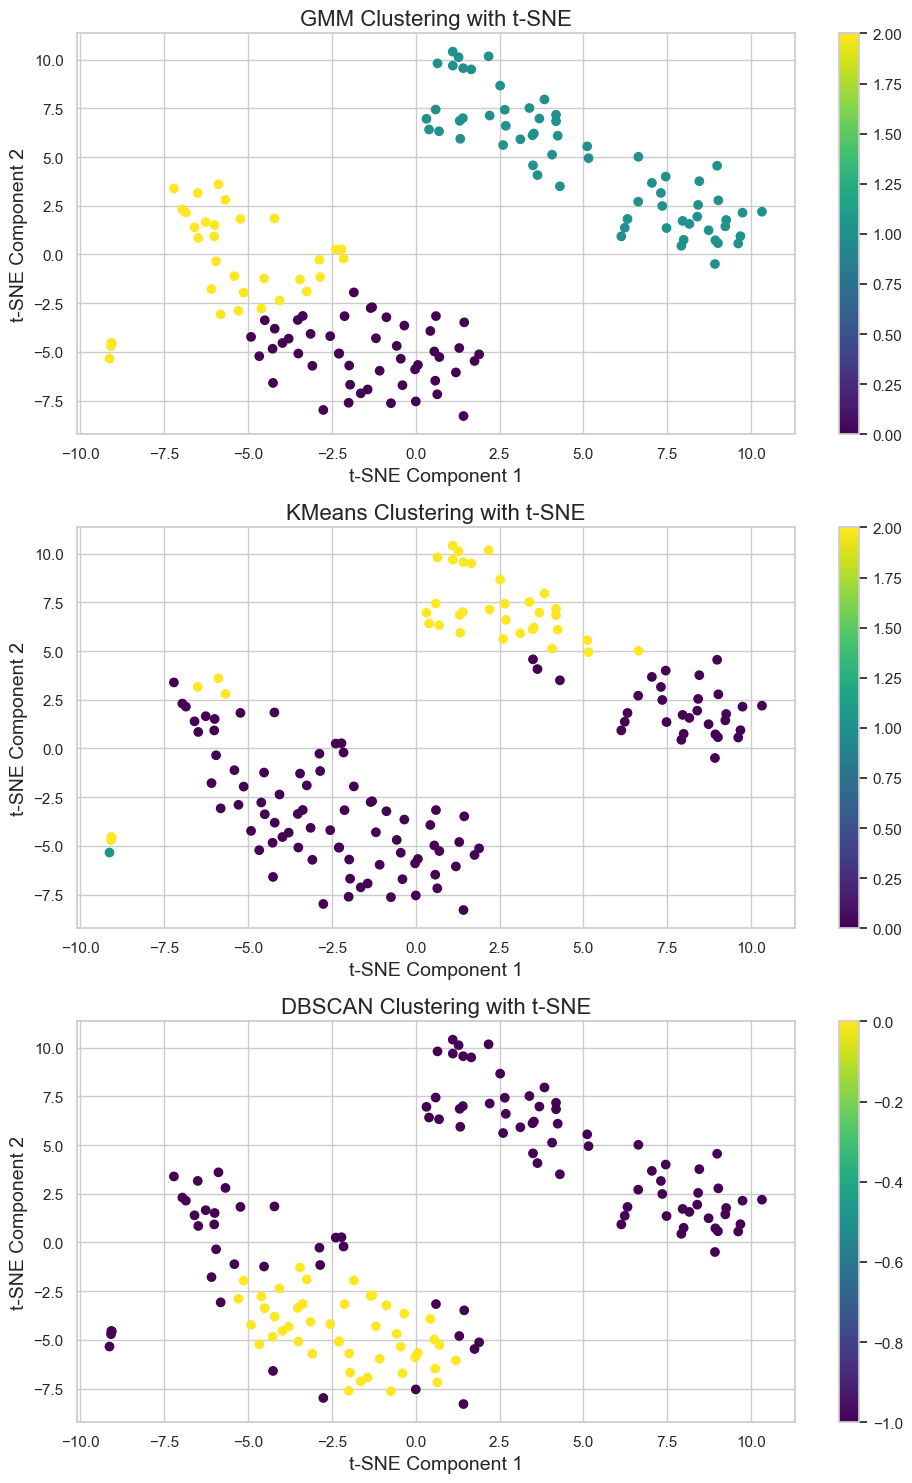

In [18]:

# Reduce the dimension of the data to 2 using t-SNE
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data_scaled)

# Perform GMM clustering
gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(data_tsne)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Perform DBSCAN clustering with optimal parameters obtained before
db = DBSCAN(eps=0.3, min_samples=5)
db_labels = db.fit_predict(data_scaled)

# Calculate ARI and NMI for GMM, KMeans and DBSCAN
ari_gmm = adjusted_rand_score(data['Sweetspot'], gmm_labels)
nmi_gmm = normalized_mutual_info_score(data['Sweetspot'], gmm_labels)
ari_kmeans = adjusted_rand_score(data['Sweetspot'], kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(data['Sweetspot'], kmeans_labels)
ari_dbscan = adjusted_rand_score(data['Sweetspot'], db_labels)
nmi_dbscan = normalized_mutual_info_score(data['Sweetspot'], db_labels)

# Prepare a summary table
summary_table = pd.DataFrame({
    'Clustering Algorithm': ['GMM', 'KMeans', 'DBSCAN'],
    'Number of Clusters': [np.unique(gmm_labels).size, np.unique(kmeans_labels).size, np.unique(db_labels).size],
    'ARI': [ari_gmm, ari_kmeans, ari_dbscan],
    'NMI': [nmi_gmm, nmi_kmeans, nmi_dbscan]
})

summary_table



import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, figsize=(10, 15))

# Plot the GMM clusters
scatter = axs[0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='viridis')
fig.colorbar(scatter, ax=axs[0])
axs[0].set_title('GMM Clustering with t-SNE', fontsize=16)
axs[0].set_xlabel('t-SNE Component 1', fontsize=14)
axs[0].set_ylabel('t-SNE Component 2', fontsize=14)

# Plot the KMeans clusters
scatter = axs[1].scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis')
fig.colorbar(scatter, ax=axs[1])
axs[1].set_title('KMeans Clustering with t-SNE', fontsize=16)
axs[1].set_xlabel('t-SNE Component 1', fontsize=14)
axs[1].set_ylabel('t-SNE Component 2', fontsize=14)

# Plot the DBSCAN clusters
scatter = axs[2].scatter(data_tsne[:, 0], data_tsne[:, 1], c=db_labels, cmap='viridis')
fig.colorbar(scatter, ax=axs[2])
axs[2].set_title('DBSCAN Clustering with t-SNE', fontsize=16)
axs[2].set_xlabel('t-SNE Component 1', fontsize=14)
axs[2].set_ylabel('t-SNE Component 2', fontsize=14)

# Improve the layout
plt.tight_layout()

# Save the figure in high resolution
#fig.savefig('/mnt/data/Clustering_with_t-SNE.png', dpi=300)
